In [ ]:
from nltk.tokenize import sent_tokenize

In [3]:
# load text from 1st chapter
with open('/content/AmharicTTSCorpus/01/01amh.csv', 'r') as f: 
    data = f.read()

In [4]:
data

'text,audio\nቤቱን የዝምታ አዘቅት ውጦታል ፡ ከዚያ ዝምታ በዝምታ የሚመነጨው የሙዚቃ ቃና መጨረሻ የለውም::,1.mp3\nነፍስን በሀሴት ሊያወራጭ አእምሮን ኮርኩሮ ሀሳብን በስልት ሊያስደንስ ይችላል::,2.mp3\nአበራ ወርም በዚያ መጨረሻ በሌለው ዝምታ ተውጦ ሙሉ የሌሊት ልብሱን ለብሶ እንደልማዱ የጣት ጥፍሩን በጥርሱ እየከረከመ ወዲህና ወዲያ በመንጐራደድ ለገላው ያሞቀው ውሀ ወደ ገንጻው እስኪወርድለት ድረስ የወትሮው ባልሆነ ትእግስት ይጠባበቃል::,3.mp3\nቧንቧው እንፋሎት ብቻ ስለሚተፋ ወደገንጻው የሚወርደው ውሀ ዝናብ ዘንቦ ካጣራ በኋላ ከሰንበሌጥ ላይ ኮለል ከሰል እያለ እንደሚወርድ ጠፈጠፍ ስልት እየጠበቀ አንድ ላንድ ይንጠባጠባል ።,4.mp3\nትኩስ የህይወት ጠብታ ትኩስ ወፍራም የህይወት ጠብታ የሚል ሀሳብ ላንዳፍታ አእምሮው ውስጥ እንደመብረቅ ብልጭ ብሎ መልሶ ድርዎ ኣለ::,5.mp3\nየአበራ አእምሮ ካንድ ሀሳብ ወደሌላ ሀሳብ ስለሚጋልብ አንድ ነገር በተልይ ወስዶ እስከ መጨረሻው ድረስ ሊያስብበት አይችልም::,6.mp3\nለዚህ ነበር ባለቅኔ፣ወይም ደራሲ ወይም ሰአሊ የመሆን ተስፋውን ውስጡ ቀብሮ ያስቀረው::,7.mp3\nነፍሱ ግን ራሷን ባንድ ነገር ለመግለጥ ዘለአለም እንደዋተተች እንደቃተተች ትኖራለች::,8.mp3\nአእምሮው ወዲያና ወዲህ እንደሚባከን ስለሚያውቅ አዘውትሮ «ሀሳብ መጨረሻ የለውም ቁም ነገሩ መኖር ነው የኑሮን ጣእም ማወቅ ሀሳብ የፈጠረው ግብ ካልደረሰ ውጤቱ ያው ነው ፤ ምሪትና ብስጭት:: አዎንህ ዕሳ ምናለና?» ይላል::,9.mp3\nአንድ ትልቅ ወፍራም ጥቁር ዝንብ ከየት መጣ ሳይባል እንግዳ ቤት ገብቶ ዋዝዝ እያለ አንዱ ከኮርኒሱ ጋር አብዛኛውን ጊዜ ከመስነቱ መስተዋት ጋር አንዱንዱ ደግሞ ከተንጠለጠሉት ባለአራት ጡት መብራቶች ጋ

In [5]:
paragraphs = data.split("\n\n")

In [45]:
import pandas as pd
df = pd.read_csv('/content/AmharicTTSCorpus/01/01amh.csv', encoding ="utf-8")

In [46]:
df.head(5)

,text,audio
0,ቤቱን የዝምታ አዘቅት ውጦታል ፡ ከዚያ ዝምታ በዝምታ የሚመነጨው የሙዚቃ ...,1.mp3
1,ነፍስን በሀሴት ሊያወራጭ አእምሮን ኮርኩሮ ሀሳብን በስልት ሊያስደንስ ይች...,2.mp3
2,አበራ ወርም በዚያ መጨረሻ በሌለው ዝምታ ተውጦ ሙሉ የሌሊት ልብሱን ለብሶ...,3.mp3
3,ቧንቧው እንፋሎት ብቻ ስለሚተፋ ወደገንጻው የሚወርደው ውሀ ዝናብ ዘንቦ ካ...,4.mp3
4,ትኩስ የህይወት ጠብታ ትኩስ ወፍራም የህይወት ጠብታ የሚል ሀሳብ ላንዳፍታ...,5.mp3


In [9]:
df['text_len'] = df['text'].astype(str).apply(len)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from wordcloud import WordCloud

In [11]:
top_dict = {}

In [12]:
for i in df['text']:
  ii = i.split(" ")
  for iii in ii:
    if iii in top_dict:
      top_dict[iii] += 1
    else:
      top_dict[iii] = 1

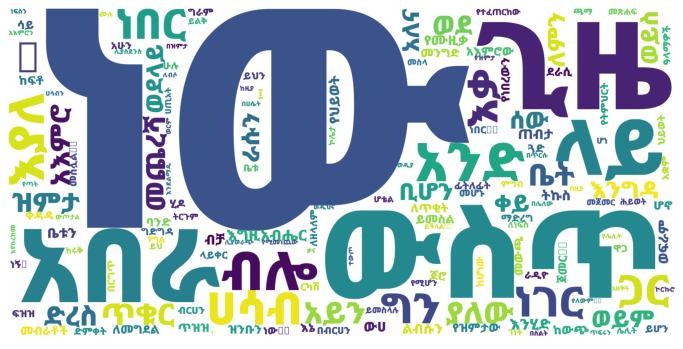

In [14]:
def show_wordcloud(data):
    WC = WordCloud(
        font_path='/content/AmharicTTSCorpus/dataViz/NotoSansEthiopic-Black.ttf',
        background_color='white',
        #stopwords=stopwords,
        #max_words=1000,
        max_font_size=500, 
        scale=5,
        random_state=1 
    )
    wordcloud = WC.generate_from_frequencies(data)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(top_dict)

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df['text_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='text length',
    linecolor='black',
    yTitle='count',
    title='Text Length Distribution')

In [20]:
from nltk.tokenize import sent_tokenize
paragraph_sentence_list = []
for paragraph in paragraphs:
    paragraph = paragraph.replace("\n", "" )
    paragraph = paragraph.replace(" — ", "")
    # paragraph = re.sub(r'[^a-zA-Z0–9_*.,?!åäöèÅÄÖÈÉçëË]', ' ',    paragraph)
    paragraph_sentence_list.append(sent_tokenize(paragraph))

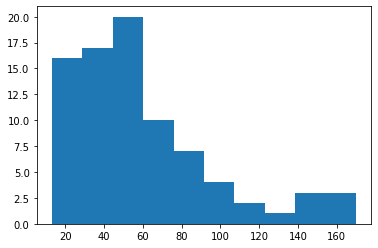

In [21]:
plt.hist(df['text_len'])
plt.show()

In [47]:
from collections import Counter
words = []
for sent in df['text']:
  words += sent.split(" ")
words = Counter(words)


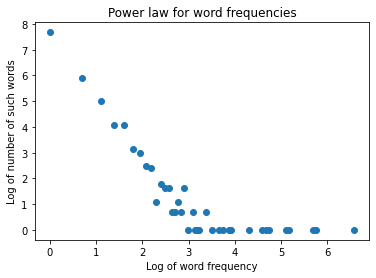

In [49]:
import numpy as np
import matplotlib.pyplot as plt
counter_of_counts = Counter(words.values())
word_counts = np.array(list(counter_of_counts.keys()))
freq_of_word_counts = np.array(list(counter_of_counts.values()))
plt.scatter(np.log(word_counts), np.log(freq_of_word_counts))
plt.xlabel('Log of word frequency')
plt.ylabel('Log of number of such words')
plt.title('Power law for word frequencies')
plt.show();

# Audio Viz

In [ ]:
!pip install librosa

In [ ]:
!apt install ffmpeg

In [54]:
from IPython.display import *
Audio("/content/AmharicTTSCorpus/01/audios/10.mp3", autoplay=False)

In [55]:
Audio("/content/AmharicTTSCorpus/01/audios/75.mp3", autoplay=False)

In [58]:
Audio("/content/AmharicTTSCorpus/01/audios/66.mp3", autoplay=False)

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
# ipd.Audio('/content/10_kadmas_bashager.mp3')

In [ ]:
plt.figure(figsize=(15,4))
filename = '/content/10_kadmas_bashager.mp3'

data,sample_rate1 = librosa.load(filename, sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')


In [ ]:
!jar xvf audios.zip

In [ ]:
from librosa import *
import matplotlib.pylab as plt
import numpy as np


In [ ]:
y, sr = librosa.load('/content/audios/2.mp3')
D = librosa.stft(y) #Short-Time Fourier Transform

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
s = np.abs(librosa.stft(y)**2) # Get magnitude of stft
chroma = librosa.feature.chroma_stft(S=s, sr=sr) #change sound to numbers

In [ ]:
chroma

array([[0.01668098, 0.09179037, 0.2118156 , ..., 0.03234819, 0.04052499,
        0.05615843],
       [0.0282264 , 0.03634157, 0.05628527, ..., 0.04434963, 0.07967233,
        0.09043872],
       [0.1048976 , 0.04028402, 0.06519606, ..., 0.11010748, 0.11463733,
        0.11116333],
       ...,
       [0.11517407, 0.33552486, 0.38243055, ..., 0.13883659, 0.08805513,
        0.11421658],
       [0.02183858, 0.12932655, 0.11528074, ..., 0.0750337 , 0.05961833,
        0.07351033],
       [0.0207407 , 0.07886848, 0.11383469, ..., 0.05568333, 0.04745989,
        0.05753213]], dtype=float32)

In [ ]:
chroma = np.cumsum(chroma)

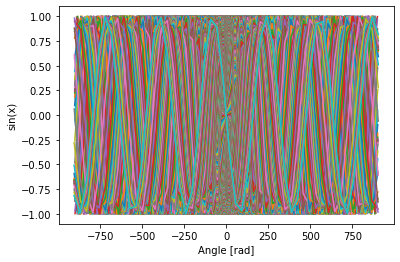

In [ ]:
x = np.linspace(-chroma, chroma)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


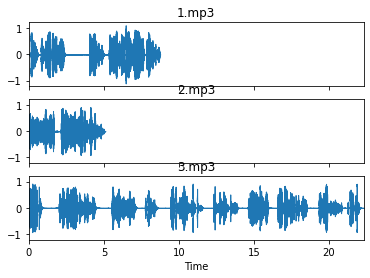

In [ ]:
import librosa.display
fig, ax = plt.subplots( nrows=3, sharex=True, sharey=True)
for i in range(1,4):
  y, sr = librosa.load('/content/audios/'+str(i)+'.mp3')
  librosa.display.waveplot(y, sr=sr, ax=ax[i-1])
  ax[i-1].set(title=str(i)+'.mp3')
  ax[i-1].label_outer()


# Spectrogram

To show the intensity or loudness of the audio files


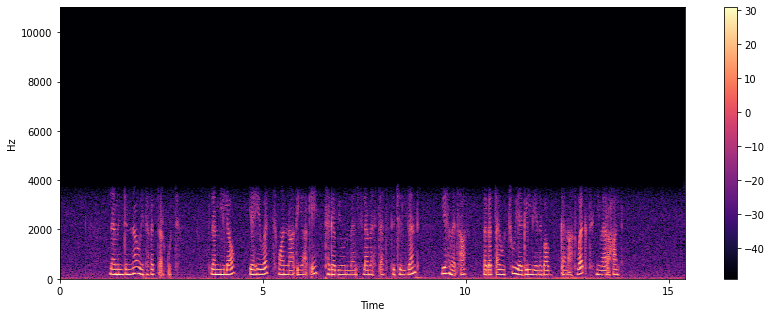

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
n0 = 9000
n1 = 9100
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

2


# TTS